## Modeling - Classifying Book Cover by Genre
> This was using 5 total genres

#### This notebook was run in Google Colab

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from sklearn.utils import class_weight

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.losses import CategoricalCrossentropy

from sklearn.metrics import ConfusionMatrixDisplay

np.random.seed(42)

In [ ]:
!unzip /content/drive/MyDrive/datasets/capstone/images.zip

In [3]:
train = pd.read_csv('/content/drive/MyDrive/datasets/capstone/data/train_genre_cleaned.csv', index_col=0)
test = pd.read_csv('/content/drive/MyDrive/datasets/capstone/data/test_genre_cleaned.csv', index_col=0)

### Baseline Model

In [4]:
train['category'].value_counts(normalize=True)

Biographies & Memoirs           0.2
Literature & Fiction            0.2
Teen & Young Adult              0.2
Science Fiction & Fantasy       0.2
Mystery, Thriller & Suspense    0.2
Name: category, dtype: float64

### CNN Model with 5 Categories

In [7]:
datagen = ImageDataGenerator(rescale=1/255)

In [145]:
train_gen = datagen.flow_from_dataframe(
    dataframe=train,
    directory='/content/224x224',
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(256,256),
    shuffle=True
)

test_gen = datagen.flow_from_dataframe(
    dataframe=test,
    directory='/content/224x224',
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(256,256),
    shuffle=False
)

Found 8550 validated image filenames belonging to 5 classes.
Found 950 validated image filenames belonging to 5 classes.


In [85]:
model1 = Sequential()
model1.add(Conv2D(64,(3,3),activation='relu',input_shape=(256,256,3)))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(5,activation='softmax'))

model1.compile(
    optimizer =Adam(learning_rate=0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [86]:
early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
)

In [87]:
history1 = model1.fit(
    train_gen,
    validation_data=test_gen,
    epochs=10,
    callbacks=[early_stop]
)

Epoch 1/10
268/268 [==============================] - 23s 86ms/step - loss: 1.5814 - accuracy: 0.2619 - val_loss: 1.5556 - val_accuracy: 0.2958
Epoch 2/10
268/268 [==============================] - 24s 90ms/step - loss: 1.5031 - accuracy: 0.3461 - val_loss: 1.5582 - val_accuracy: 0.3200
Epoch 3/10
268/268 [==============================] - 23s 85ms/step - loss: 1.3805 - accuracy: 0.4382 - val_loss: 1.5290 - val_accuracy: 0.3411
Epoch 4/10
268/268 [==============================] - 22s 83ms/step - loss: 1.2265 - accuracy: 0.5276 - val_loss: 1.5938 - val_accuracy: 0.3316
Epoch 5/10
268/268 [==============================] - 22s 83ms/step - loss: 1.0515 - accuracy: 0.6104 - val_loss: 1.6203 - val_accuracy: 0.3442
Epoch 6/10
268/268 [==============================] - 22s 82ms/step - loss: 0.8768 - accuracy: 0.6871 - val_loss: 1.7424 - val_accuracy: 0.3200
Epoch 7/10
268/268 [==============================] - 24s 88ms/step - loss: 0.7016 - accuracy: 0.7723 - val_loss: 1.9326 - val_accuracy:

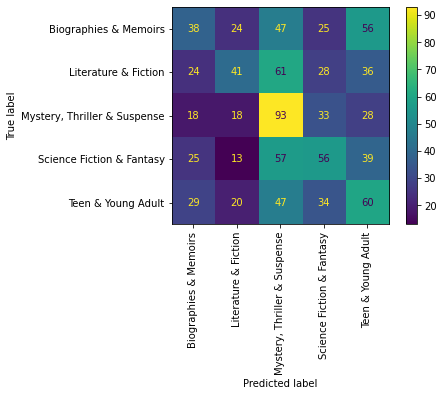

In [254]:
ConfusionMatrixDisplay.from_predictions(
    test_gen.classes, 
    np.argmax(model1.predict(test_gen), axis=1), 
    display_labels=list(test_gen.class_indices.keys()),
    xticks_rotation='vertical');

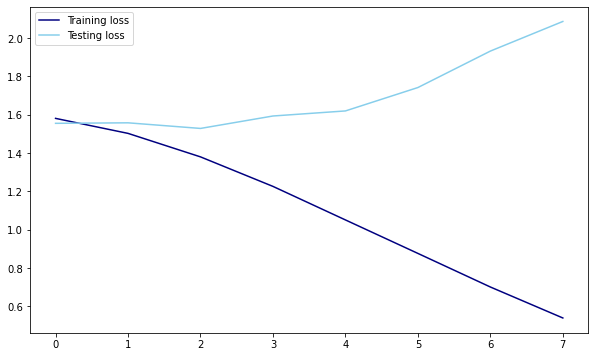

In [99]:
train_loss = history1.history['loss']
test_loss = history1.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

#### Adding Dropout Layer

In [91]:
model2 = Sequential()
model2.add(Conv2D(64,(3,3),activation='relu',input_shape=(256,256,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(5,activation='softmax'))

model2.compile(
    optimizer =Adam(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [92]:
history2 = model2.fit(
    train_gen,
    validation_data=test_gen,
    epochs=10,
    callbacks=[early_stop]
)

Epoch 1/10
268/268 [==============================] - 27s 98ms/step - loss: 1.7673 - accuracy: 0.2433 - val_loss: 1.5699 - val_accuracy: 0.2705
Epoch 2/10
268/268 [==============================] - 22s 81ms/step - loss: 1.5383 - accuracy: 0.3062 - val_loss: 1.5538 - val_accuracy: 0.2758
Epoch 3/10
268/268 [==============================] - 24s 90ms/step - loss: 1.3815 - accuracy: 0.4084 - val_loss: 1.6492 - val_accuracy: 0.3011
Epoch 4/10
268/268 [==============================] - 22s 83ms/step - loss: 1.0985 - accuracy: 0.5460 - val_loss: 1.7635 - val_accuracy: 0.3232
Epoch 5/10
268/268 [==============================] - 22s 82ms/step - loss: 0.8039 - accuracy: 0.6909 - val_loss: 2.2178 - val_accuracy: 0.2863
Epoch 6/10
268/268 [==============================] - 23s 86ms/step - loss: 0.5744 - accuracy: 0.7954 - val_loss: 2.4865 - val_accuracy: 0.2979
Epoch 7/10
268/268 [==============================] - 22s 84ms/step - loss: 0.4346 - accuracy: 0.8416 - val_loss: 2.8197 - val_accuracy:

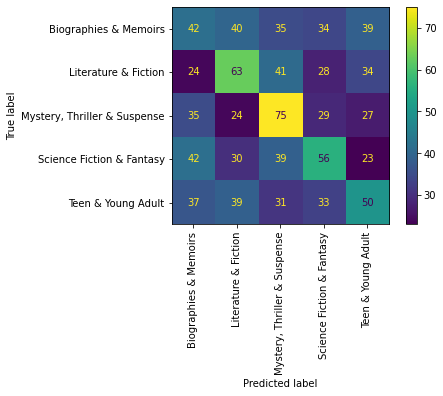

In [255]:
ConfusionMatrixDisplay.from_predictions(
    test_gen.classes, 
    np.argmax(model2.predict(test_gen), axis=1), 
    display_labels=list(test_gen.class_indices.keys()),
    xticks_rotation='vertical');

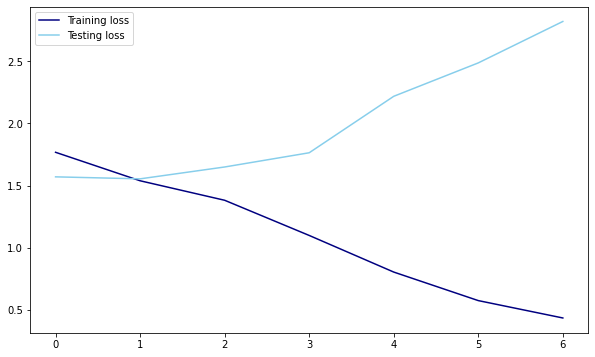

In [103]:
train_loss = history2.history['loss']
test_loss = history2.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

#### Adding More Layers

In [9]:
model3 = Sequential()
model3.add(Conv2D(64,(3,3),activation='relu',input_shape=(256,256,3)))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(5,activation='softmax'))

model3.compile(
    optimizer = Adam(learning_rate=.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
history3 = model3.fit(
    train_gen,
    validation_data=test_gen,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
268/268 [==============================] - 34s 84ms/step - loss: 1.5855 - accuracy: 0.2556 - val_loss: 1.5607 - val_accuracy: 0.2600
Epoch 2/100
268/268 [==============================] - 22s 83ms/step - loss: 1.5533 - accuracy: 0.2887 - val_loss: 1.5532 - val_accuracy: 0.2926
Epoch 3/100
268/268 [==============================] - 24s 89ms/step - loss: 1.5256 - accuracy: 0.3288 - val_loss: 1.5323 - val_accuracy: 0.3042
Epoch 4/100
268/268 [==============================] - 28s 103ms/step - loss: 1.4887 - accuracy: 0.3524 - val_loss: 1.5034 - val_accuracy: 0.3547
Epoch 5/100
268/268 [==============================] - 22s 82ms/step - loss: 1.4514 - accuracy: 0.3827 - val_loss: 1.4981 - val_accuracy: 0.3600
Epoch 6/100
268/268 [==============================] - 23s 86ms/step - loss: 1.4041 - accuracy: 0.4108 - val_loss: 1.5006 - val_accuracy: 0.3632
Epoch 7/100
268/268 [==============================] - 22s 83ms/step - loss: 1.3527 - accuracy: 0.4370 - val_loss: 1.4950 - val_a

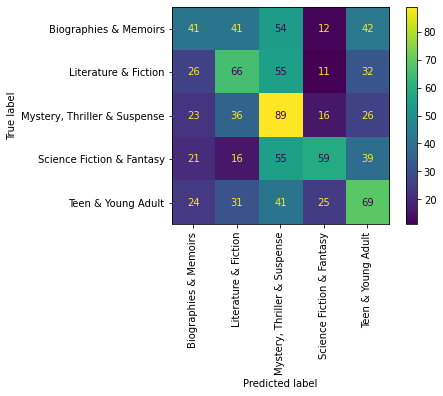

In [206]:
ConfusionMatrixDisplay.from_predictions(
    test_gen.classes, 
    np.argmax(model3.predict(test_gen), axis=1), 
    display_labels=list(test_gen.class_indices.keys()),
    xticks_rotation='vertical');

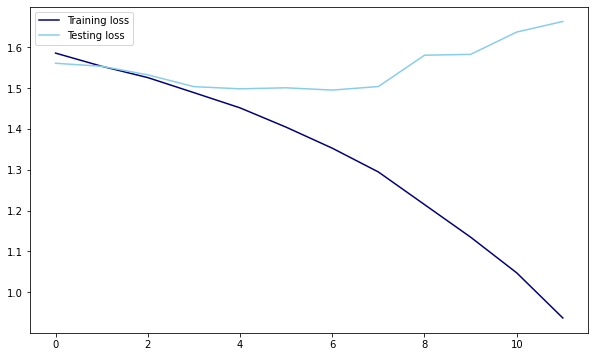

In [83]:
train_loss = history3.history['loss']
test_loss = history3.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

#### Adding More Layers

In [12]:
model4 = Sequential()
model4.add(Conv2D(64,(3,3),activation='relu',input_shape=(256,256,3)))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Flatten())
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(5,activation='softmax'))

model4.compile(
    optimizer = Adam(learning_rate=.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
history4 = model4.fit(
    train_gen,
    validation_data=test_gen,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
268/268 [==============================] - 25s 91ms/step - loss: 1.5913 - accuracy: 0.2400 - val_loss: 1.5663 - val_accuracy: 0.2853
Epoch 2/100
268/268 [==============================] - 21s 80ms/step - loss: 1.5585 - accuracy: 0.2874 - val_loss: 1.5578 - val_accuracy: 0.2642
Epoch 3/100
268/268 [==============================] - 22s 81ms/step - loss: 1.5415 - accuracy: 0.3112 - val_loss: 1.5427 - val_accuracy: 0.3000
Epoch 4/100
268/268 [==============================] - 22s 80ms/step - loss: 1.5254 - accuracy: 0.3213 - val_loss: 1.5315 - val_accuracy: 0.3105
Epoch 5/100
268/268 [==============================] - 22s 82ms/step - loss: 1.4974 - accuracy: 0.3558 - val_loss: 1.5485 - val_accuracy: 0.3095
Epoch 6/100
268/268 [==============================] - 22s 81ms/step - loss: 1.4694 - accuracy: 0.3694 - val_loss: 1.5071 - val_accuracy: 0.3442
Epoch 7/100
268/268 [==============================] - 22s 81ms/step - loss: 1.4473 - accuracy: 0.3874 - val_loss: 1.5128 - val_ac

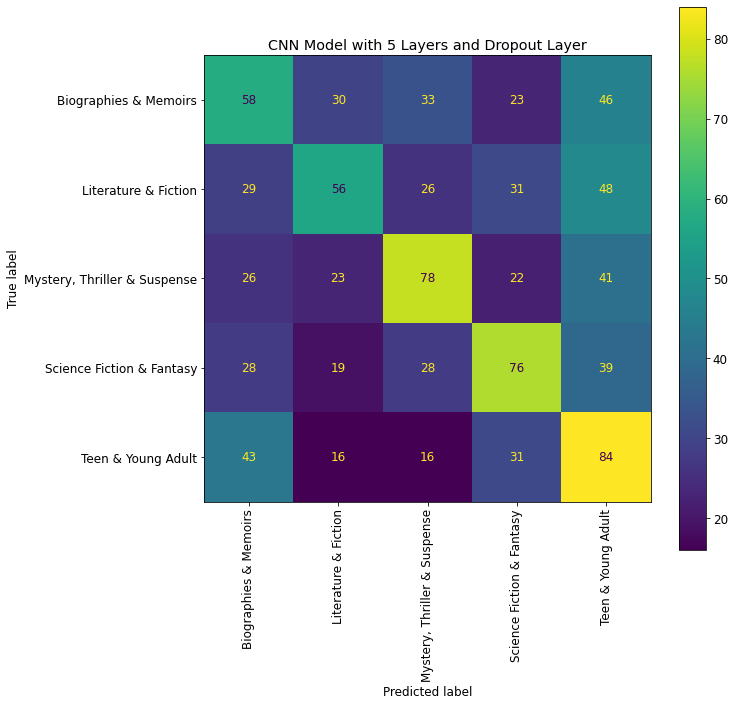

<Figure size 432x288 with 0 Axes>

In [248]:
fig,ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(
    test_gen.classes, 
    np.argmax(model4.predict(test_gen), axis=1), 
    display_labels=list(test_gen.class_indices.keys()),
    xticks_rotation='vertical', ax=ax)
plt.title('CNN Model with 5 Layers and Dropout Layer')
plt.rcParams.update({'font.size':12})
plt.show()

plt.savefig('/content/drive/MyDrive/datasets/capstone/cm_genre');

- The confusion matrix above, while this model has a low accuracy score (0.37), it's still tending to have the highest amount of predictions for each respective class (though there are still many misclassifications).

> Creating preds df

In [200]:
preds_df = pd.DataFrame(model4.predict(test_gen), columns=test_gen.class_indices.keys())

In [202]:
test.head(3)

,amazon_index,filename,image_url,title,author,category_id,category
2,60750715,0060750715.jpg,http://ecx.images-amazon.com/images/I/51p5aUY%...,George Balanchine: The Ballet Maker (Eminent L...,Robert Gottlieb,1,Biographies & Memoirs
5,312556411,0312556411.jpg,http://ecx.images-amazon.com/images/I/51uNnIlI...,Literature and Its Writers: A Compact Introduc...,Ann Charters,15,Literature & Fiction
26,1583419543,1583419543.jpg,http://ecx.images-amazon.com/images/I/51AiMilD...,The Story of the New Orleans Hornets (The NBA:...,Tyler Omoth,27,Teen & Young Adult


> Reversing the dictionary for classes

In [201]:
d = {v:k for k,v in test_gen.class_indices.items()}
d

{0: 'Biographies & Memoirs',
 1: 'Literature & Fiction',
 2: 'Mystery, Thriller & Suspense',
 3: 'Science Fiction & Fantasy',
 4: 'Teen & Young Adult'}

> Adding columns to the preds_df with classes and true classes

In [203]:
preds_df['true'] = test_gen.classes
preds_df['true'] = preds_df['true'].map(d)
preds_df['filename'] = test['filename'].values
preds_df['predicted'] = np.argmax(model4.predict(test_gen), axis=1)
preds_df['predicted'] = preds_df['predicted'].map(d)

> Saving preds_df for more exploring in the future

In [244]:
preds_df.to_csv('/content/drive/MyDrive/datasets/capstone/genre_preds.csv', index=False)

In [25]:
preds_df = pd.read_csv('../data/genre_preds.csv')

In [26]:
preds_df.head()

,Biographies & Memoirs,Literature & Fiction,"Mystery, Thriller & Suspense",Science Fiction & Fantasy,Teen & Young Adult,true,filename,predicted
0,0.161482,0.288080,0.299126,0.134385,0.116927,Biographies & Memoirs,0060750715.jpg,"Mystery, Thriller & Suspense"
1,0.275201,0.101902,0.134845,0.199077,0.288975,Literature & Fiction,0312556411.jpg,Teen & Young Adult
2,0.252380,0.101969,0.324143,0.043050,0.278457,Teen & Young Adult,1583419543.jpg,"Mystery, Thriller & Suspense"
3,0.033345,0.049624,0.031853,0.728589,0.156589,Science Fiction & Fantasy,1932564462.jpg,Science Fiction & Fantasy
4,0.059364,0.132560,0.367929,0.209615,0.230532,"Mystery, Thriller & Suspense",0982565062.jpg,"Mystery, Thriller & Suspense"


In [27]:
misclassifications = preds_df[preds_df['true'] != preds_df['predicted']]
correct_preds = preds_df[preds_df['true'] == preds_df['predicted']]

In [28]:
misclassifications.reset_index(inplace=True, drop=True)
correct_preds.reset_index(inplace=True, drop=True, )

In [30]:
misclassifications.iloc[58]

Biographies & Memoirs                            0.101288
Literature & Fiction                             0.128346
Mystery, Thriller & Suspense                     0.309796
Science Fiction & Fantasy                        0.327584
Teen & Young Adult                               0.132985
true                                 Literature & Fiction
filename                                   0986155608.jpg
predicted                       Science Fiction & Fantasy
Name: 58, dtype: object

In [31]:
misclassifications['true'].value_counts(normalize=True)

Literature & Fiction            0.224080
Biographies & Memoirs           0.220736
Science Fiction & Fantasy       0.190635
Mystery, Thriller & Suspense    0.187291
Teen & Young Adult              0.177258
Name: true, dtype: float64

In [32]:
misclassifications['predicted'].value_counts(normalize=True)

Teen & Young Adult              0.290970
Biographies & Memoirs           0.210702
Science Fiction & Fantasy       0.178930
Mystery, Thriller & Suspense    0.172241
Literature & Fiction            0.147157
Name: predicted, dtype: float64

In [33]:
correct_preds['true'].value_counts(normalize=True)

Teen & Young Adult              0.238636
Mystery, Thriller & Suspense    0.221591
Science Fiction & Fantasy       0.215909
Biographies & Memoirs           0.164773
Literature & Fiction            0.159091
Name: true, dtype: float64

In [34]:
correct_preds['predicted'].value_counts(normalize=True)

Teen & Young Adult              0.238636
Mystery, Thriller & Suspense    0.221591
Science Fiction & Fantasy       0.215909
Biographies & Memoirs           0.164773
Literature & Fiction            0.159091
Name: predicted, dtype: float64

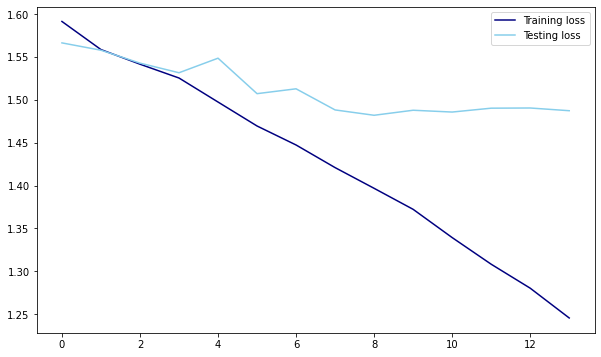

In [82]:
train_loss = history4.history['loss']
test_loss = history4.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

### Data Augmentation

In [15]:
aug_train_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)

datagen = ImageDataGenerator(rescale=1/255)

In [151]:
aug_train = aug_train_gen.flow_from_dataframe(
    dataframe=train,
    directory='/content/224x224',
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(256,256)
)

aug_test = datagen.flow_from_dataframe(
    dataframe=test,
    directory='/content/224x224',
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(256,256),
    shuffle=False
)

Found 8550 validated image filenames belonging to 5 classes.
Found 950 validated image filenames belonging to 5 classes.


In [17]:
model5 = Sequential()
model5.add(Conv2D(64,(3,3),activation='relu',input_shape=(256,256,3)))
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Conv2D(64,(3,3),activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Conv2D(64,(3,3),activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Conv2D(64,(3,3),activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Conv2D(64,(3,3),activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Flatten())
model5.add(Dense(64,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(5,activation='softmax'))

model5.compile(
    optimizer = Adam(learning_rate=.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [18]:
history5 = model5.fit(
    aug_train,
    validation_data=aug_test,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
268/268 [==============================] - 126s 470ms/step - loss: 1.5962 - accuracy: 0.2338 - val_loss: 1.5760 - val_accuracy: 0.2695
Epoch 2/100
268/268 [==============================] - 119s 445ms/step - loss: 1.5732 - accuracy: 0.2634 - val_loss: 1.5644 - val_accuracy: 0.2684
Epoch 3/100
268/268 [==============================] - 117s 438ms/step - loss: 1.5596 - accuracy: 0.2861 - val_loss: 1.5744 - val_accuracy: 0.2621
Epoch 4/100
268/268 [==============================] - 119s 444ms/step - loss: 1.5477 - accuracy: 0.2995 - val_loss: 1.5431 - val_accuracy: 0.2958
Epoch 5/100
268/268 [==============================] - 118s 439ms/step - loss: 1.5373 - accuracy: 0.3145 - val_loss: 1.5693 - val_accuracy: 0.2863
Epoch 6/100
268/268 [==============================] - 132s 493ms/step - loss: 1.5284 - accuracy: 0.3228 - val_loss: 1.5184 - val_accuracy: 0.3253
Epoch 7/100
268/268 [==============================] - 130s 484ms/step - loss: 1.5176 - accuracy: 0.3282 - val_loss: 1

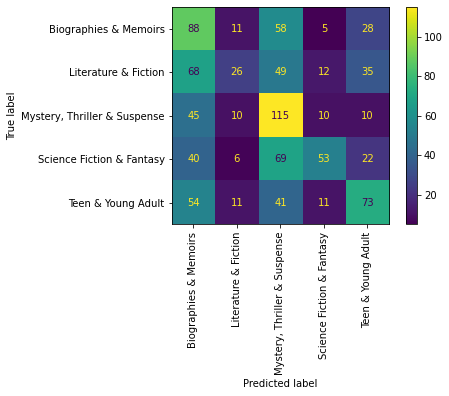

In [152]:
ConfusionMatrixDisplay.from_predictions(
    aug_test.classes, 
    np.argmax(model5.predict(aug_test), axis=1), 
    display_labels=list(aug_test.class_indices.keys()),
    xticks_rotation='vertical');

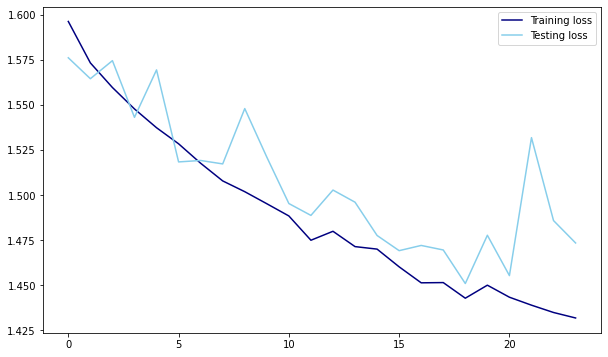

In [81]:
train_loss = history5.history['loss']
test_loss = history5.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

### EfficientNet with Data Augmentation

In [153]:
eff_aug_train = aug_train_gen.flow_from_dataframe(
    dataframe=train,
    directory='/content/224x224',
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(224,224)
)

eff_aug_test = datagen.flow_from_dataframe(
    dataframe=test,
    directory='/content/224x224',
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(224,224),
    shuffle=False
)

Found 8550 validated image filenames belonging to 5 classes.
Found 950 validated image filenames belonging to 5 classes.


In [22]:
effnet = EfficientNetB0(include_top=False, weights='imagenet')

16719872/16705208 [==============================] - 0s 0us/step


In [23]:
effnet.trainable = False

In [24]:
model6 = Sequential()
model6.add(effnet)
model6.add(GlobalAveragePooling2D())
model6.add(Dense(64, activation='relu'))
model6.add(Dense(5, activation='softmax'))

model6.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [25]:
history6 = model6.fit(
    eff_aug_train,
    batch_size=32,
    validation_data=eff_aug_test,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
268/268 [==============================] - 110s 386ms/step - loss: 1.6100 - accuracy: 0.2049 - val_loss: 1.6092 - val_accuracy: 0.2063
Epoch 2/100
268/268 [==============================] - 95s 355ms/step - loss: 1.6104 - accuracy: 0.1968 - val_loss: 1.6097 - val_accuracy: 0.2011
Epoch 3/100
268/268 [==============================] - 93s 349ms/step - loss: 1.6101 - accuracy: 0.2039 - val_loss: 1.6097 - val_accuracy: 0.2000
Epoch 4/100
268/268 [==============================] - 95s 354ms/step - loss: 1.6096 - accuracy: 0.2060 - val_loss: 1.6092 - val_accuracy: 0.2000
Epoch 5/100
268/268 [==============================] - 93s 347ms/step - loss: 1.6100 - accuracy: 0.2012 - val_loss: 1.6097 - val_accuracy: 0.2000
Epoch 6/100
268/268 [==============================] - 96s 359ms/step - loss: 1.6104 - accuracy: 0.2005 - val_loss: 1.6092 - val_accuracy: 0.2000
Epoch 7/100
268/268 [==============================] - 95s 353ms/step - loss: 1.6102 - accuracy: 0.2041 - val_loss: 1.6091 

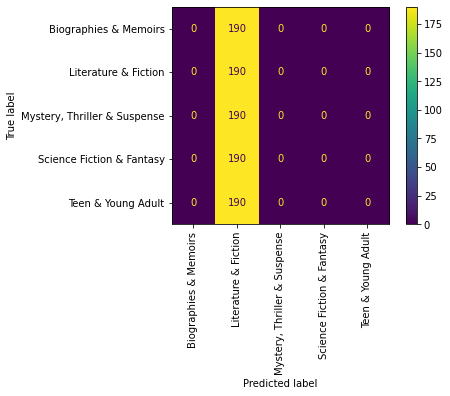

In [154]:
ConfusionMatrixDisplay.from_predictions(
    aug_test.classes, 
    np.argmax(model6.predict(eff_aug_test), axis=1), 
    display_labels=list(eff_aug_test.class_indices.keys()),
    xticks_rotation='vertical');

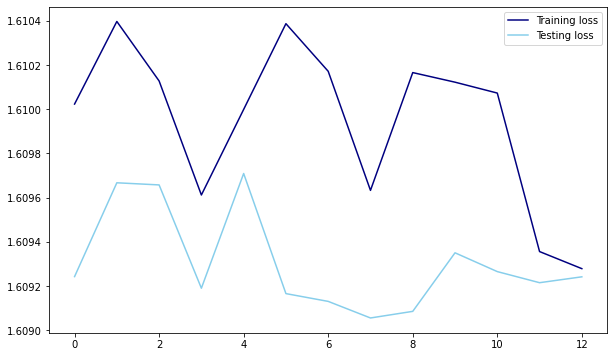

In [80]:
train_loss = history6.history['loss']
test_loss = history6.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

### EfficientNet Without Data Augmentation

In [27]:
eff_gen = ImageDataGenerator(rescale=1/255)

In [155]:
eff_aug_train_2 = eff_gen.flow_from_dataframe(
    dataframe=train,
    directory='/content/224x224',
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(224,224)
)

eff_aug_test_2 = eff_gen.flow_from_dataframe(
    dataframe=test,
    directory='/content/224x224',
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(224,224),
    shuffle=False
)

Found 8550 validated image filenames belonging to 5 classes.
Found 950 validated image filenames belonging to 5 classes.


In [29]:
model7 = Sequential()
model7.add(effnet)
model7.add(GlobalAveragePooling2D())
model7.add(Dense(64, activation='relu'))
model7.add(Dense(5, activation='softmax'))

model7.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [30]:
history7 = model7.fit(
    eff_aug_train_2,
    batch_size=32,
    validation_data=eff_aug_test_2,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
268/268 [==============================] - 26s 78ms/step - loss: 1.6113 - accuracy: 0.1933 - val_loss: 1.6103 - val_accuracy: 0.2000
Epoch 2/100
268/268 [==============================] - 20s 74ms/step - loss: 1.6096 - accuracy: 0.2071 - val_loss: 1.6097 - val_accuracy: 0.2000
Epoch 3/100
268/268 [==============================] - 20s 73ms/step - loss: 1.6104 - accuracy: 0.2048 - val_loss: 1.6096 - val_accuracy: 0.2000
Epoch 4/100
268/268 [==============================] - 19s 72ms/step - loss: 1.6100 - accuracy: 0.1998 - val_loss: 1.6104 - val_accuracy: 0.2000
Epoch 5/100
268/268 [==============================] - 20s 75ms/step - loss: 1.6099 - accuracy: 0.2026 - val_loss: 1.6090 - val_accuracy: 0.2232
Epoch 6/100
268/268 [==============================] - 19s 72ms/step - loss: 1.6101 - accuracy: 0.2028 - val_loss: 1.6093 - val_accuracy: 0.2000
Epoch 7/100
268/268 [==============================] - 19s 72ms/step - loss: 1.6095 - accuracy: 0.2080 - val_loss: 1.6094 - val_ac

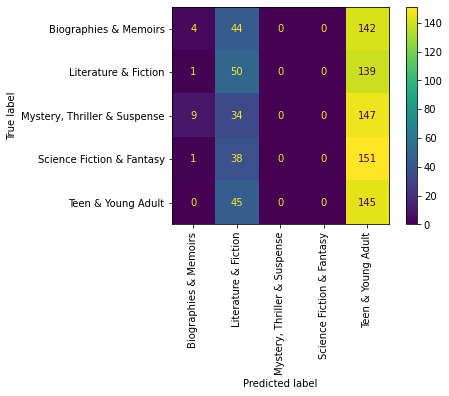

In [156]:
ConfusionMatrixDisplay.from_predictions(
    aug_test.classes, 
    np.argmax(model7.predict(eff_aug_test_2), axis=1), 
    display_labels=list(eff_aug_test_2.class_indices.keys()),
    xticks_rotation='vertical');

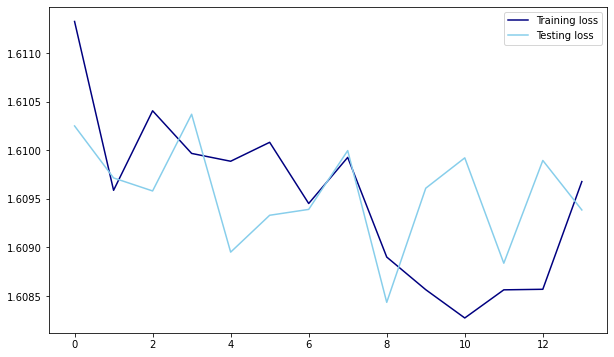

In [79]:
train_loss = history7.history['loss']
test_loss = history7.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

### CNN - Tuning Parameters

In [34]:
model8 = Sequential()
model8.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model8.add(MaxPooling2D(pool_size=(2,2)))

model8.add(Conv2D(32,(3,3),activation='relu'))
model8.add(MaxPooling2D(pool_size=(2,2)))

model8.add(Conv2D(64,(3,3),activation='relu'))
model8.add(MaxPooling2D(pool_size=(2,2)))

model8.add(Conv2D(64,(3,3),activation='relu'))
model8.add(MaxPooling2D(pool_size=(2,2)))

model8.add(Conv2D(64,(3,3),activation='relu'))
model8.add(MaxPooling2D(pool_size=(2,2)))

model8.add(Flatten())
model8.add(Dense(128,activation='relu'))
model8.add(Dropout(0.4))
model8.add(Dense(5,activation='softmax'))

model8.compile(
    optimizer = Adam(learning_rate=.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [35]:
history8 = model8.fit(
    train_gen,
    validation_data=test_gen,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
268/268 [==============================] - 22s 79ms/step - loss: 1.6019 - accuracy: 0.2256 - val_loss: 1.5772 - val_accuracy: 0.2600
Epoch 2/100
268/268 [==============================] - 21s 77ms/step - loss: 1.5626 - accuracy: 0.2892 - val_loss: 1.5517 - val_accuracy: 0.3084
Epoch 3/100
268/268 [==============================] - 21s 78ms/step - loss: 1.5360 - accuracy: 0.3115 - val_loss: 1.5384 - val_accuracy: 0.3168
Epoch 4/100
268/268 [==============================] - 21s 78ms/step - loss: 1.5115 - accuracy: 0.3343 - val_loss: 1.5341 - val_accuracy: 0.3032
Epoch 5/100
268/268 [==============================] - 21s 80ms/step - loss: 1.4810 - accuracy: 0.3571 - val_loss: 1.5383 - val_accuracy: 0.3242
Epoch 6/100
268/268 [==============================] - 21s 77ms/step - loss: 1.4431 - accuracy: 0.3849 - val_loss: 1.5390 - val_accuracy: 0.3253
Epoch 7/100
268/268 [==============================] - 21s 78ms/step - loss: 1.3908 - accuracy: 0.4175 - val_loss: 1.5413 - val_ac

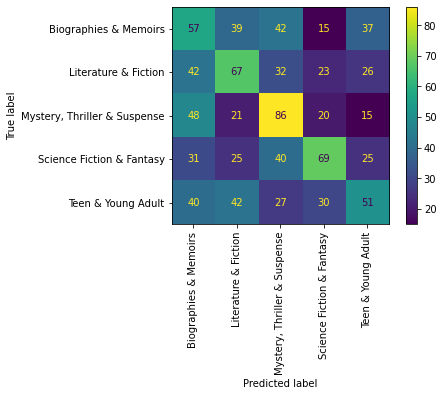

In [157]:
ConfusionMatrixDisplay.from_predictions(
    test_gen.classes, 
    np.argmax(model8.predict(test_gen), axis=1), 
    display_labels=list(test_gen.class_indices.keys()),
    xticks_rotation='vertical');

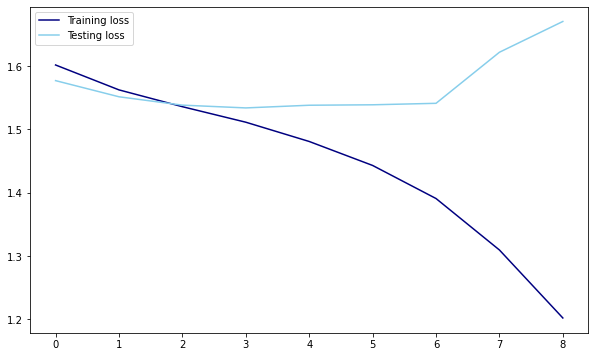

In [78]:
train_loss = history8.history['loss']
test_loss = history8.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

### Running Earlier CNN Model without Early Stop and Larger Dropout Layer

In [53]:
model9 = Sequential()
model9.add(Conv2D(64,(3,3),activation='relu',input_shape=(256,256,3)))
model9.add(MaxPooling2D(pool_size=(2,2)))

model9.add(Conv2D(64,(3,3),activation='relu'))
model9.add(MaxPooling2D(pool_size=(2,2)))

model9.add(Conv2D(64,(3,3),activation='relu'))
model9.add(MaxPooling2D(pool_size=(2,2)))

model9.add(Conv2D(64,(3,3),activation='relu'))
model9.add(MaxPooling2D(pool_size=(2,2)))

model9.add(Conv2D(64,(3,3),activation='relu'))
model9.add(MaxPooling2D(pool_size=(2,2)))

model9.add(Flatten())
model9.add(Dense(64,activation='relu'))
model9.add(Dropout(0.9))
model9.add(Dense(5,activation='softmax'))

model9.compile(
    optimizer = Adam(learning_rate=.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [54]:
history9 = model9.fit(
    train_gen,
    validation_data=test_gen,
    epochs=40
)

Epoch 1/40
268/268 [==============================] - 23s 84ms/step - loss: 1.6101 - accuracy: 0.2056 - val_loss: 1.6081 - val_accuracy: 0.1989
Epoch 2/40
268/268 [==============================] - 22s 83ms/step - loss: 1.6096 - accuracy: 0.2075 - val_loss: 1.6077 - val_accuracy: 0.2326
Epoch 3/40
268/268 [==============================] - 24s 88ms/step - loss: 1.6050 - accuracy: 0.2179 - val_loss: 1.6018 - val_accuracy: 0.2484
Epoch 4/40
268/268 [==============================] - 22s 83ms/step - loss: 1.6005 - accuracy: 0.2212 - val_loss: 1.5885 - val_accuracy: 0.2663
Epoch 5/40
268/268 [==============================] - 22s 82ms/step - loss: 1.5971 - accuracy: 0.2319 - val_loss: 1.5954 - val_accuracy: 0.2495
Epoch 6/40
268/268 [==============================] - 23s 86ms/step - loss: 1.5943 - accuracy: 0.2372 - val_loss: 1.5801 - val_accuracy: 0.2768
Epoch 7/40
268/268 [==============================] - 22s 82ms/step - loss: 1.5895 - accuracy: 0.2550 - val_loss: 1.5835 - val_accuracy:

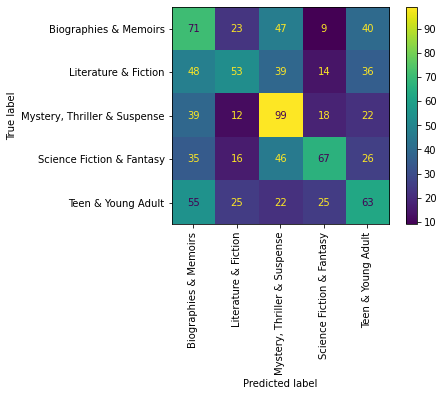

In [158]:
ConfusionMatrixDisplay.from_predictions(
    test_gen.classes, 
    np.argmax(model9.predict(test_gen), axis=1), 
    display_labels=list(test_gen.class_indices.keys()),
    xticks_rotation='vertical');

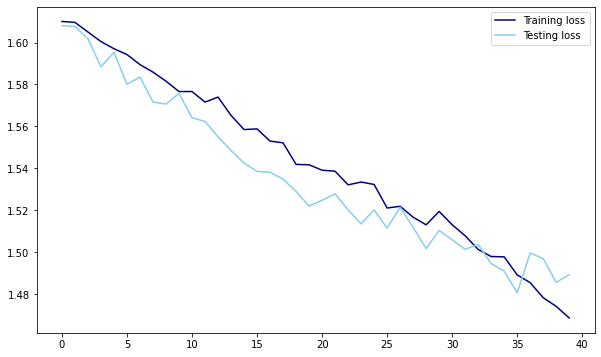

In [57]:
train_loss = history9.history['loss']
test_loss = history9.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();